In [1]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Mounted at /content/drive


In [2]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

## CHAP 10. 추정

- 본격적인 추론통계

- 추론통계 → 추정과 검정
- 추정 → 점추정과 구간추정
- 점추정(10-1절)
- 구간추정(10-2절)

- 4장의 데이터
  - 4장은 모평균에 관한 점추정
- 모평균 구간추정,
- 모분산 점추정과 구간추정

- 임포트

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 소수점 이하 3자리까지 출력
%precision 3
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3, suppress=True)

# 그래프가 Jupyter Notebook 위에 표시되도록 설정
%matplotlib inline

- 테스트 데이터 준비

In [4]:
# 작업 디렉토리 아래 data 폴더에 있는 csv 파일을 읽어 들여 DataFrame 자료구조로 저장한다.
df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
printobj(scores[:10])

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])


 <class 'numpy.ndarray'> 



- 정답 미리 준비 : 모평균 $μ$, 모분산 $σ^2$

In [5]:
p_mean = np.mean(scores)
p_var = np.var(scores)
printobj(p_mean, p_var)

69.53


 <class 'numpy.float64'> 



206.6691


 <class 'numpy.float64'> 



- 많은 응시자 → 정규분포로 근사
- 모집단 정규분포 가정 → 구간추정

- 정규분포 타당성 → 전교생 히스토그램 vs $N(μ,σ^2)$

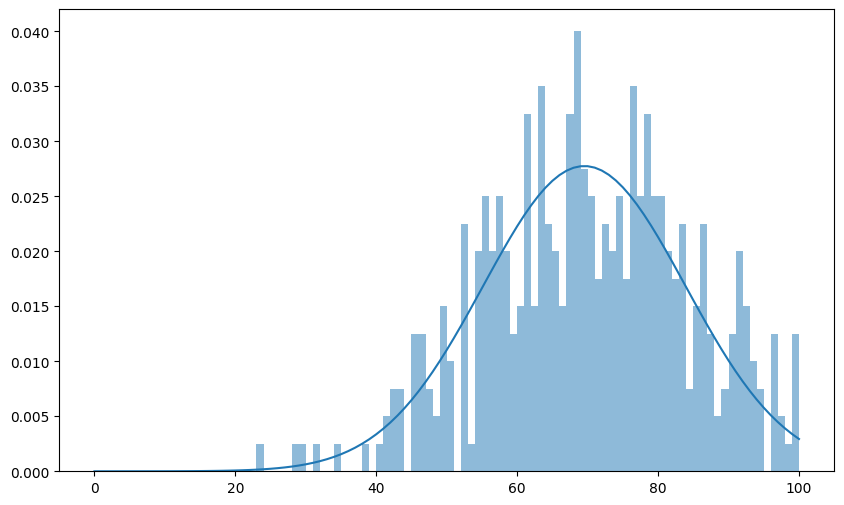

[그림 10-1] 점수의 분포와 정규분포


In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='#1f77b4')
ax.hist(scores, bins=100, range=(0, 100),
        density=True, alpha=0.5)

plt.show()
print('[그림 10-1] 점수의 분포와 정규분포')

- 정규분포에 가까운 특징

- 20명 표본 데이터 준비
  - A 학생이 아는 유일한 데이터

In [7]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
printobj(sample)

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])


 <class 'numpy.ndarray'> 



- 크기 20 표본 데이터 1만 개 준비
- 평균, 분산 추정 정확도 시뮬레이션

In [8]:
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))
printobj(samples)

array([[ 68,  75,  91, ...,  72,  57,  59],
       [ 97,  55,  61, ...,  65,  73,  71],
       [ 78,  67,  43, ...,  76,  62,  71],
       ...,
       [ 72,  87,  84, ...,  65,  59,  87],
       [ 54,  74,  69, ...,  69,  97,  72],
       [ 78,  57,  85, ...,  68, 100,  94]])


 <class 'numpy.ndarray'> 



### 10-1. 점추정

- 하나의 수치로 추정
  - 4장 A 학생의 모평균 추정
  - 표본평균으로 점추정

- 표본평균 우수?
- 모분산 점추정

#### 1) 모평균의 점추정

- 20명의 시험 점수
  - 기대값 $μ$, 분산 $σ^2$인 확률분포 따름
  - 서로 독립인 확률변수 $X_{1}$, $X_{2}$, $⋯$, $X_{20}$

- $\bar{X}=\frac{X_{1}+X_{2}+⋯+X_{n}}{n}$도 확률변수
  - 시행마다 다른 결과

In [9]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650


- $E(\bar{X}) = μ$
  - **불편성**(unbiasedness)
  - **불편추정량**(unbiased estimate)

- 대수의 법칙으로 확인

In [10]:
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.53799999999998

- 모평균 $69.530$
- 표본평균의 우수성 → 불편성

- 표본 크기 $n$ 증가 → 모수에 수렴
  - **일치성**(consistency)
  - **일치추정량**(consistent estimate)

- 표본 크기 $n$ → $1,000,000$

In [11]:
np.mean(np.random.choice(scores, 1000000))

69.542954

- 모평균에 수렴

- 불편성/일치성 → 추정량의 바람직한 성질
  - 표본평균 → 모평균 잘 추정
  - 좋은 추정량

- A 학생 추출 표본의 표본평균

In [12]:
s_mean = np.mean(sample)
printobj(s_mean)

70.4


 <class 'numpy.float64'> 



#### 2) 모분산의 점추정

- 표본분산도 좋은 추정량?

- $\frac{1}{n} \sum_{i=1}^{n}{(X_{i} - \bar{X})^{2}}$도 확률변수
  - 시행마다 다른 결과

In [13]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


- 불편추정량인지 대수의 법칙으로 확인

In [14]:
sample_b_vars = np.var(samples, axis=1)
np.mean(sample_b_vars)

196.34417850000003

- $σ^2=206.669$에 비해 작은 값
  - 불편추정량 아닌 듯

- **불편 표본분산**(unbiased sample variance)이다.
  - 분모 $n$ → $(n-1)$

$$
S^{2}=\frac{1}{n-1} \sum_{i=1}^{n}{(X_{i}-\bar{X})^{2}} \tag{10-1}
$$

- 분모 $(n-1)$ → **자유도**(degree of freedom)
  - 표본평균의 경우
  - 분산의 경우

- 왜 자유도로 나누는가?

- 이제부터, 불편 표본분산 → 표본분산
  - 항상 $(n-1)$로 나눔 → 모분산과 구별

> **모분산과 표본분산**

> 모분산 $σ^2$과 표본분산 $S^2$은.<br><br>
>
> $$
> \begin{align}
> σ^{2} & = \frac{1}{N} \sum_{i=1}^{N}{(x_{i}-μ)^{2}} \\\\
> S^{2} & = \frac{1}{n-1} \sum_{i=1}^{n}{(X_{i}-\bar{X})^{2}}
> \end{align}
> \tag{10-2}
> $$<br>
>
> 와 같다.

- ddof = 1
- 큰 수의 법칙으로 확인

In [15]:
sample_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_vars)

206.67808263157895

- 모분산의 불편추정량

- 일치추정량 확인 → $n = 1,000,000$

In [16]:
np.var(np.random.choice(scores, 1000000), ddof=1)

207.08336592317

- 모분산의 일치추정량
  - 좋은 추정량

- 표본분산

In [17]:
s_var = np.var(sample, ddof=1)
printobj(s_var)

158.25263157894742


 <class 'numpy.float64'> 



#### 3) 정리

- 좋은 추정량

> **불편성** : 기대값이 추측하려는 모수가 되는 성질
>
> **일치성** : 표본 크기를 키우면 추측하려는 모수에 수렴하는 성질

- 모평균과 모분산의 추정량

> **모평균과 모분산의 점추정**

> $X_{1}$, $X_{2}$, $⋯$, $X_{n}$이
> - 서로 독립이고, 기대값이 $μ$, 분산이 $σ^2$인 확률분포를 따를 때,
>
> 표본평균 $\bar{X}$와 표본분산 $S^2$은 각각
> - 모평균 $μ$와 모분산 $σ^2$에 대하여 불편성과 일치성을 지닌 추정량이 된다.

- 분산의 종류

> **분산의 종류**

> 수집한 데이터를 잘 설명하기 위해 **기술 통계**를 수행하는 경우
> - 모분산 $σ^2$ 적용 : $N$으로 나눔 → ddof=0
>
> 수집한 데이터를 바탕으로 예측 등 **추론 통계**를 수행하는 경우
> - 표본분산 $S^2$ 적용 : $(n-1)$으로 나눔 → ddof=1
> - 따라서, 모분산 대신 쓰는 경우는 항상 $(n-1)$로 나눈다.

### 10-2. 구간추정

- 표본평균/표본분산은 확률변수 → 우연하 편향 가능
- 범위에 있다는 주장 → 구간추정

#### 1) 정규분포의 모평균 구간추정 : 모분산을 알고 있는 경우

- 모평균 구간추정
  - 정규분포
  - 모분산 아는 경우

- $\bar{X} ∼ N(μ,\,\frac{σ^2}{n})$

- $\bar{X}$
  - $μ$ 중심으로
  - $\sqrt{\frac{σ^2}{n}}$만큼 분산 → **표준오차**(standard error)

- $σ^2$ 아는 경우
  - $\sqrt{\frac{σ^2}{n}}$ 계산 가능

- $Z=(\bar{X}-μ)/\sqrt{\frac{σ^2}{n}}$으로 표준화 → 표준정규분포
  - $100(1-α)\%$ 구간 계산

- $95\%$ 구간
  - $(\bar{X}-μ)/\sqrt{\frac{σ^2}{n}}$에 대한 부등식

$$
P\left(z_{0.975} ≤ (\bar{X}-μ)/\sqrt{\frac{σ^2}{n}} ≤ z_{0.025} \right) = 0.95
\tag{10-3}
$$

- 확률변수 $(\bar{X}-μ)/\sqrt{\frac{σ^2}{n}}$가 $[z_{0.975}, \, z_{0.025}]$에 위치할 확률이 $95\%$

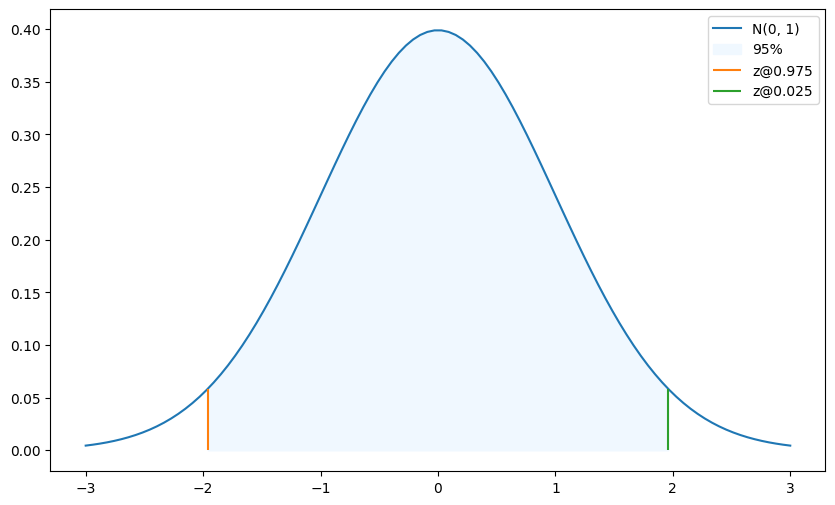

[그림 10-2] 표준정규분포의 95%구간


In [18]:
rv = stats.norm(0, 1)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')

z1, z2 = rv.interval(0.95)
xf = np.linspace(z1, z2, 100)
ax.fill_between(xf, rv.pdf(xf), label='95%',
                color='aliceblue')
ax.vlines(z1, 0, rv.pdf(z1),
          label='z@0.975', color='#ff7f0e')
ax.vlines(z2, 0, rv.pdf(z2),
          label='z@0.025', color='#2ca02c')

ax.legend()
plt.show()
print('[그림 10-2] 표준정규분포의 95%구간')

- $μ$의 부등식으로

$$
P\left(
\bar{X}
-
z_{0.025}\sqrt{\frac{σ^2}{n}}
≤ μ ≤
\bar{X}
-
z_{0.975}\sqrt{\frac{σ^2}{n}}
\right)
= 0.95
\tag{10-4}
$$

- 다음 구간이 $μ$를 포함하는 확률이 $95\%$

$$
\left[
\bar{X}
-
z_{0.025}\sqrt{\frac{σ^2}{n}}
,\;
\bar{X}
-
z_{0.975}\sqrt{\frac{σ^2}{n}}
\right]
\tag{10-5}
$$

- 모평균 구간추정의 결과
  - 신뢰수준 $95\%$ **신뢰구간**(confidence interval, CI)
  - **신뢰상한**(upper confidence limit), **신뢰하한**(lower confidence limit)

- 일반화

> **모분산을 알고 있을 때 모평균의 신뢰구간**

> $X_{1}, X_{2}, ⋯, X_{n} \overset{iid}{∼}N(μ,σ^2)$일 때
> - 모분산 $σ^2$을 알고 있다면, 신뢰수준 $100(1-α)\%$인 신뢰구간은<br><br>
$$
\left[
\bar{X}
-
z_{\frac{α}{2}}\sqrt{\frac{σ^2}{n}}
,\;
\bar{X}
-
z_{1-\frac{α}{2}}\sqrt{\frac{σ^2}{n}}
\right]
\tag{10-6}
$$<br>
이 된다.

- 파이썬 구현

In [19]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(64.09956018535247, 76.70043981464754)

- $95\%$ 신뢰구간 $[64.1, 76.7]$
  - 모평균 $69.53$점 → 구간 내 포함

- 신뢰구간에 대한 잘못된 해석

- 신뢰구간에 대한 바른 해석

- 시뮬레이션

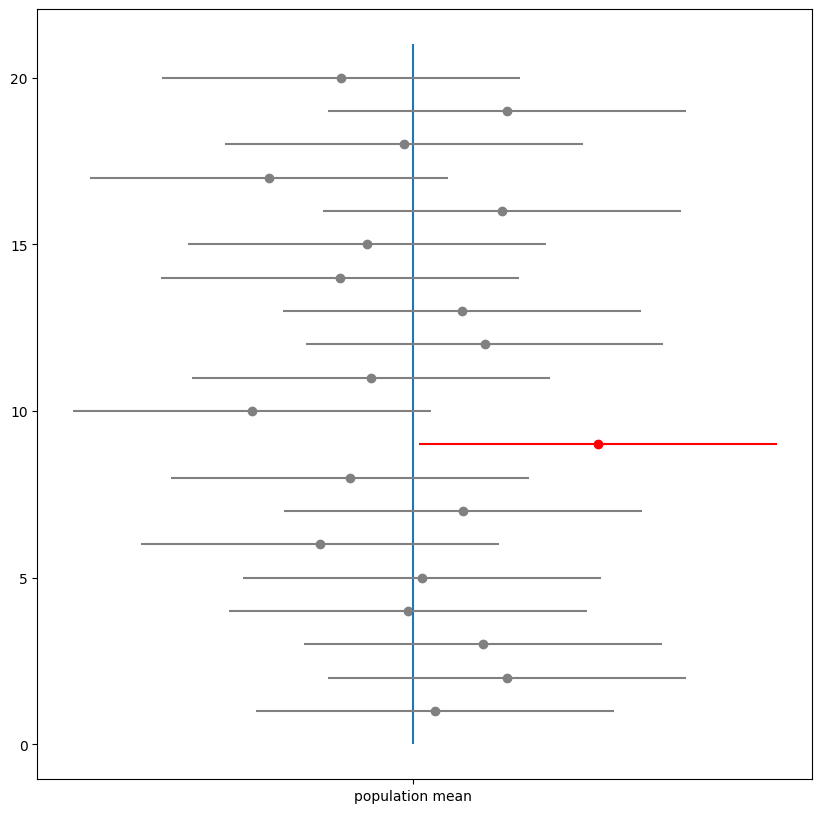

[그림 10-3] 모평균의 구간추정 시뮬레이션


In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='r')
        ax.hlines(n_samples-i, lcl, ucl, color='r')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()
print('[그림 10-3] 모평균의 구간추정 시뮬레이션')

- 20번 중 1번 모평균 포함하지 않음

- 1만 번 시행

In [21]:
rv = stats.norm()
count = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        count += 1
count / len(samples)

0.951

- 신뢰구간의 약 95%가 모평균을 포함함

#### 2) 정규분포의 모분산 구간추정

- 모분산 구간추정
  - 정규분포
  - 모평균 모르는 경우

- 목표 형태

$$
P(* ≤ σ^2 ≤ *) = 0.95
\tag{10-7}
$$

- $S^2$에 대한 변환 필요

- $Y=\frac{(n-1)S^2}{σ^2}$
  - $Y∼χ^2(n-1)$로 알려짐

- 파이썬 확인

In [22]:
sample_y = sample_vars * (n-1) / p_var
printobj(sample_y)

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])


 <class 'numpy.ndarray'> 



- $Y$ 히스토그램과 $χ^2(n-1)$ 비교

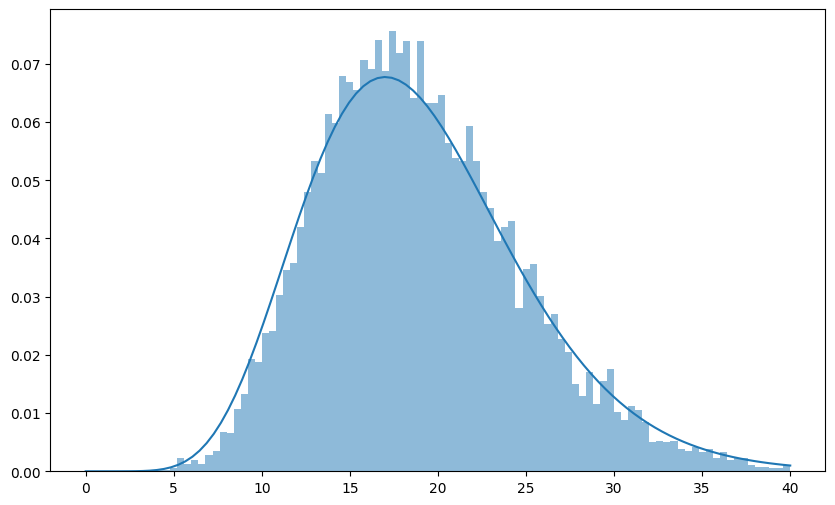

[그림 10-4] 표본분산과 카이제곱분포


In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='#1f77b4')
hist, _, _ = ax.hist(sample_y, bins=100,
                     range=(0, 40), density=True,
                     alpha=0.5)

plt.show()
print('[그림 10-4] 표본분산과 카이제곱분포')

- 대략 $χ^2(n-1)$과 일치
- 본 분포 모분산 구간추정

- $χ^2(n-1)$의 $95\%$ 구간

$$
P\left(χ^2_{0.975}(n-1) ≤ \frac{(n-1)S^2}{σ^2} ≤ χ^2_{0.025}(n-1) \right) = 0.95
\tag{10-8}
$$

- $σ^2$의 부등식으로

$$
P\left( \frac{(n-1)S^2}{χ^2_{0.025}(n-1)} ≤ σ^2 ≤ \frac{(n-1)S^2}{χ^2_{0.975}(n-1)} \right) = 0.95
\tag{10-9}
$$

- $σ^2$의 신뢰수준 $95\%$ 신뢰구간

$$
\left[ \frac{(n-1)S^2}{χ^2_{0.025}(n-1)}
,\;
\frac{(n-1)S^2}{χ^2_{0.975}(n-1)} \right]
\tag{10-10}
$$

- 일반화

> **모분산의 신뢰구간**

> $X_{1}, X_{2}, ⋯, X_{n} \overset{iid}{∼}N(μ,σ^2)$이라고 하자.
> - 모평균 $μ$가 알려져 있지 않을 때, 신뢰수준 $100(1-α)\%$의 신뢰구간은<br><br>
$$
\left[ \frac{(n-1)S^2}{χ^2_{\frac{α}{2}}(n-1)}
,\;
\frac{(n-1)S^2}{χ^2_{1-\frac{α}{2}}(n-1)} \right]
\tag{10-11}
$$<br>
으로 추정된다.

- 파이썬 구현

In [24]:
rv = stats.chi2(df=n-1)
lcl = (n-1) * s_var / rv.isf(0.025)
ucl = (n-1) * s_var / rv.isf(0.975)

lcl, ucl

(91.52471947132238, 337.5955129124592)

- $95\%$ 신뢰구간 $[91.525, 337.596]$
  - 모분산 $206.669$ → 구간 내 포함

- 모분산의 $95\%$ 신뢰구간의 이미지

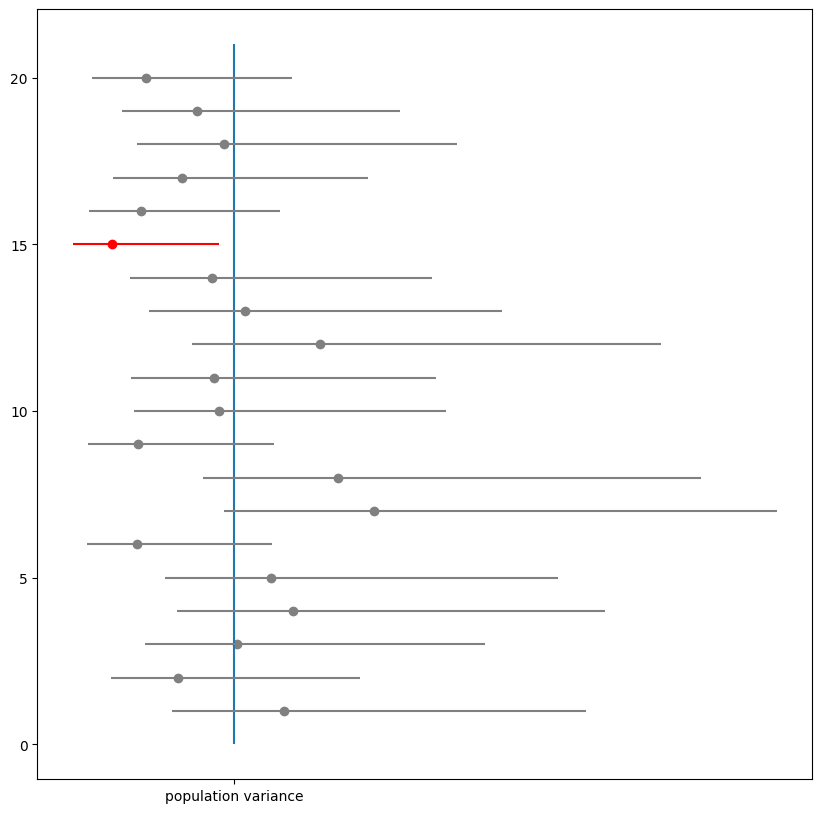

[그림 10-5] 모분산의 구간추정 시뮬레이션


In [25]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * s_var_ / rv.isf(0.025)
    ucl = (n-1) * s_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(s_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(s_var_, n_samples-i, color='r')
        ax.hlines(n_samples-i, lcl, ucl, 'r')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()
print('[그림 10-5] 모분산의 구간추정 시뮬레이션')

- 1만 번 시행

In [26]:
rv = stats.chi2(df=n-1)
count = 0
for sample_ in samples:
    s_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * s_var_ / rv.isf(0.025)
    ucl = (n-1) * s_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        count += 1

count / len(samples)

0.964

- 신뢰구간의 약 96%가 모분산을 포함함

#### 3) 정규분포의 모평균 구간추정 : 모분산을 모르는 경우

- $σ^2$을 아는 경우
  - 표준오차 $\sqrt{\frac{σ^2}{n}}$으로 구간추정

- $σ^2$을 모르는 경우의 문제점은
  - 표준오차 계산이 불가능
  - 모분산 $σ^2$ 대신 표본분산 $S^2$을 사용

- $\sqrt{\frac{S^2}{n}}$으로 $\bar{X}$ 변환

$$
t = \cfrac{(\bar{X}-μ)}{\sqrt{\cfrac{S^2}{n}}}
\tag{10-12}
$$

- $t$는 표준정규분포 $Z$와 자유도 $(n-1)$인 카이제곱분포 $Y$로

$$t = \cfrac{Z}{\sqrt{Y/(n-1)}} \tag{10-13}$$

- $t$는 자유도가 $(n-1)$인 t분포를 따름
  - $t=(\bar{X}-μ)/\sqrt{\frac{S^2}{n}} ∼ t(n-1)$


- $t(n-1)$의 $95\%$ 구간

$$
P\left(t_{0.975}(n-1) ≤ (\bar{X}-μ)/\sqrt{\frac{S^2}{n}} ≤ t_{0.025}(n-1) \right) = 0.95
\tag{10-14}
$$

- $μ$의 부등식으로

$$
P\left(
\bar{X}
-
t_{0.025}(n-1)\sqrt{\frac{S^2}{n}}
≤ μ ≤
\bar{X}
-
t_{0.975}(n-1)\sqrt{\frac{S^2}{n}}
\right)
= 0.95
\tag{10-15}
$$

- $μ$의 신뢰수준 $95\%$ 신뢰구간

$$
\left[
\bar{X}
-
t_{0.025}(n-1)\sqrt{\frac{S^2}{n}}
,\;
\bar{X}
-
t_{0.975}(n-1)\sqrt{\frac{S^2}{n}}
\right]
\tag{10-16}
$$

- 신뢰구간의 식은 거의 동일

> **모분산을 알지 못할 때 모평균의 신뢰구간**

> $X_{1}, X_{2}, ⋯, X_{n} \overset{iid}{∼}N(μ,σ^2)$이라고 하자.
> - 모분산 $σ^2$가 알려져 있지 않을 때, 신뢰수준 $100(1-α)\%$의 신뢰구간은<br><br>
$$
\left[
\bar{X}
-
t_{\frac{α}{2}}(n-1)\sqrt{\frac{S^2}{n}}
,\;
\bar{X}
-
t_{1-\frac{α}{2}}(n-1)\sqrt{\frac{S^2}{n}}
\right]
\tag{10-17}
$$<br>
으로 추정된다.

- 파이썬 구현

In [27]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_var/n)

lcl, ucl

(64.51244886603887, 76.28755113396114)

- $95\%$ 신뢰구간 $[64.512, 76.288]$
  - 모평균 $69.53$점 → 구간 내 포함

#### 4) 베르누이 분포의 모평균 구간추정

- 모집단 비율 $p$ 추정

- $X ∼ Bern(p)$ → $E(X) = p$
- 모평균의 추정과 같은 구조 → 모비율의 추정

- 실제 모비율 추정
  - ch10_enquete.csv
  - 상품 인지도 $p$ 조사

In [28]:
enquete_df = pd.read_csv('data/ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
printobj(enquete[:10])

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])


 <class 'numpy.ndarray'> 



- $X_1$, $X_2$, $⋯$, $X_n \overset{iid}{∼} Bern(p)$
  - $E(X_i) = p$, $Var(X_i) = p(1-p)$
  - $E(\bar{X}) = p$, $Var(\bar{X}) = \frac{p(1-p)}{n}$

- 점추정

In [29]:
s_mean = enquete.mean()
printobj(s_mean)

0.709


 <class 'numpy.float64'> 



- $95\%$ 신뢰구간
  - 표본평균 $\bar{X}$로 다음과 같이 하고 싶지만 $\bar{X}$의 분포를 모름

$$P(*≤p≤*)=0.95$$

- 중심극한정리
  - $\bar{X} ∼ N(p, \frac{p(1-p)}{n})$
  - $Z=(\bar{X}-p)/\sqrt{\frac{p(1-p)}{n}}$

$$
\begin{align}
0.95 & ≃ P\left(z_{0.975} ≤ (\bar{X}-p)/\sqrt{\frac{p(1-p)}{n}} ≤ z_{0.025} \right) \\\\
& = P\left(\bar{X} - z_{0.025}\sqrt{\frac{p(1-p)}{n}} ≤ p ≤ \bar{X} - z_{0.975}\sqrt{\frac{p(1-p)}{n}} \right) \\\\
& ≃ P\left(\bar{X} - z_{0.025}\sqrt{\frac{\bar{X}(1-\bar{X})}{n}} ≤ p ≤ \bar{X} - z_{0.975}\sqrt{\frac{\bar{X}(1-\bar{X})}{n}} \right)
\end{align}
\tag{10-18}
$$

- $p(1-p)$를 $\bar{X}(1-\bar{X})$로 근사

- 신뢰수준 $95\%$의 신뢰구간
  - $\left[\bar{X} - z_{0.025}\sqrt{\frac{\bar{X}(1-\bar{X})}{n}},\; \bar{X} - z_{0.975}\sqrt{\frac{\bar{X}(1-\bar{X})}{n}} \right]$

- 일반화

> **베르누이 분포의 모평균의 신뢰구간**

> $X_{1}, X_{2}, ⋯, X_{n} \overset{iid}{∼}Bern(p)$라고 하자.
> - 모평균의 신뢰수준 $100(1-α)\%$의 신뢰구간은<br><br>
$$
\left[\bar{X} - z_{\frac{α}{2}}\sqrt{\frac{\bar{X}(1-\bar{X})}{n}},\; \bar{X} - z_{1-\frac{α}{2}}\sqrt{\frac{\bar{X}(1-\bar{X})}{n}} \right]
\tag{10-19}
$$<br>
로 추정된다.

- 파이썬 구현

In [30]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.6808474522924337, 0.7371525477075662)

- $p$의 $95\%$ 신뢰구간 $[0.681, 0.737]$

#### 5) 포아송 분포의 모평균 구간추정

- 1시간당 액세스 수
- ch10_access.csv

In [31]:
n_access_df = pd.read_csv('data/ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
printobj(n_access[:10])

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8])


 <class 'numpy.ndarray'> 



- $X_1$, $X_2$, $⋯$, $X_n \overset{iid}{∼} Poi(λ)$
  - $E(X_i) = λ$, $Var(X_i) = λ$
  - $E(\bar{X}) = λ$, $Var(\bar{X}) = \frac{λ}{n}$

- 점추정

In [32]:
s_mean = n_access.mean()
printobj(s_mean)

10.444444444444445


 <class 'numpy.float64'> 



- $\bar{X}$의 분포 모름

- 중심극한정리
  - $\bar{X} ∼ N(λ,\frac{λ}{n})$
  - $Z=(\bar{X}-λ)/\sqrt{\frac{λ}{n}}$

- $95\%$ 신뢰구간

$$
\begin{align}
0.95 & ≃ P\left(z_{0.975} ≤ (\bar{X}-λ)/\sqrt{\frac{λ}{n}} ≤ z_{0.025} \right) \\\\
& = P\left(\bar{X} - z_{0.025}\sqrt{\frac{λ}{n}} ≤ λ ≤ \bar{X} - z_{0.975}\sqrt{\frac{λ}{n}} \right) \\\\
& ≃ P\left(\bar{X} - z_{0.025}\sqrt{\frac{\bar{X}}{n}} ≤ λ ≤ \bar{X} - z_{0.975}\sqrt{\frac{\bar{X}}{n}} \right)
\end{align}
\tag{10-20}
$$

- $λ$를 $\bar{X}$로 근사

- 신뢰수준 $95\%$의 신뢰구간
  - $\left[\bar{X} - z_{0.025}\sqrt{\frac{\bar{X}}{n}},\; \bar{X} - z_{0.975}\sqrt{\frac{\bar{X}}{n}} \right]$

- 일반화

> **포아송 분포의 모평균의 신뢰구간**

> $X_{1}, X_{2}, ⋯, X_{n} \overset{iid}{∼}Poi(λ)$라고 하자.
> - 모평균의 신뢰수준 $100(1-α)\%$의 신뢰구간은<br><br>
$$
\left[\bar{X} - z_{\frac{α}{2}}\sqrt{\frac{\bar{X}}{n}},\; \bar{X} - z_{1-\frac{α}{2}}\sqrt{\frac{\bar{X}}{n}} \right]
\tag{10-21}
$$<br>
로 추정된다.

- 파이썬 구현

In [33]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.697953549598202, 11.190935339290688)

- $λ$의 $95\%$ 신뢰구간 $[9.698, 11.191]$